# Linear Discriminant Analysis 실습

# 1. Linear Discriminant Analysis

In [88]:
import numpy as np

- LDA 를 위한 함수 불러오기

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

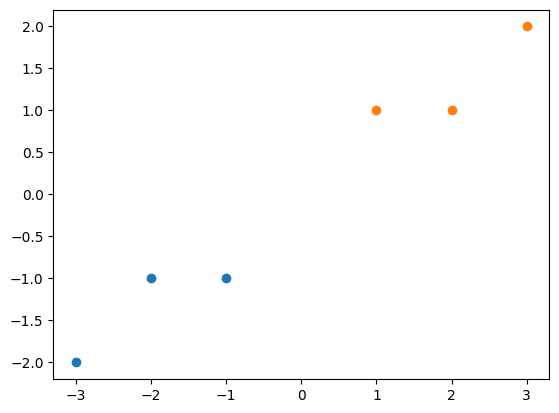

In [90]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])


from matplotlib import pyplot
plt = pyplot
plt.scatter(X[:3,0],X[:3,1])
plt.scatter(X[3:,0],X[3:,1])
plt.show() #데이터의 분산이 공분산의 형태를 따른다고 가정하자.

- LDA 모델 구축

In [91]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

LinearDiscriminantAnalysis()

[1]


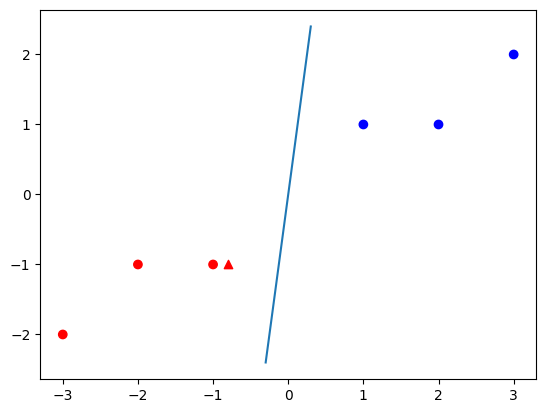

In [92]:
print(clf.predict([[-0.8, -1]])) #결과가 1로 예측함
pre_y = clf.predict([[-0.8, -1]])

#결과 시각화
from matplotlib import pyplot

a, b = clf.coef_[0]

plt = pyplot
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:,0],X[:,1], c=y, cmap=cm_bright)
plt.scatter(-0.8, -1, c=pre_y, cmap=cm_bright, marker="^")

grp_rng = np.arange(-0.3, 0.4, 0.1)
plt.plot(grp_rng, a*grp_rng+b*grp_rng)

plt.show() 


# 2. Quadratic Discriminant Analysis

- QDA를 위한 함수 불러오기

In [93]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

- QDA 모델 구축

In [94]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X,y)

QuadraticDiscriminantAnalysis()

In [95]:
print(clf2.predict([[-0.8, -1]]))

[1]


- LDA, QDA 비교

In [96]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X)
confusion_matrix(y,y_pred)  

array([[3, 0],
       [0, 3]], dtype=int64)

In [97]:
y_pred2=clf2.predict(X)
confusion_matrix(y,y_pred2)  

array([[3, 0],
       [0, 3]], dtype=int64)

# 3. LDA, QDA의 시각적 비교

In [98]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

[1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0]
[0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1]
[0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1]


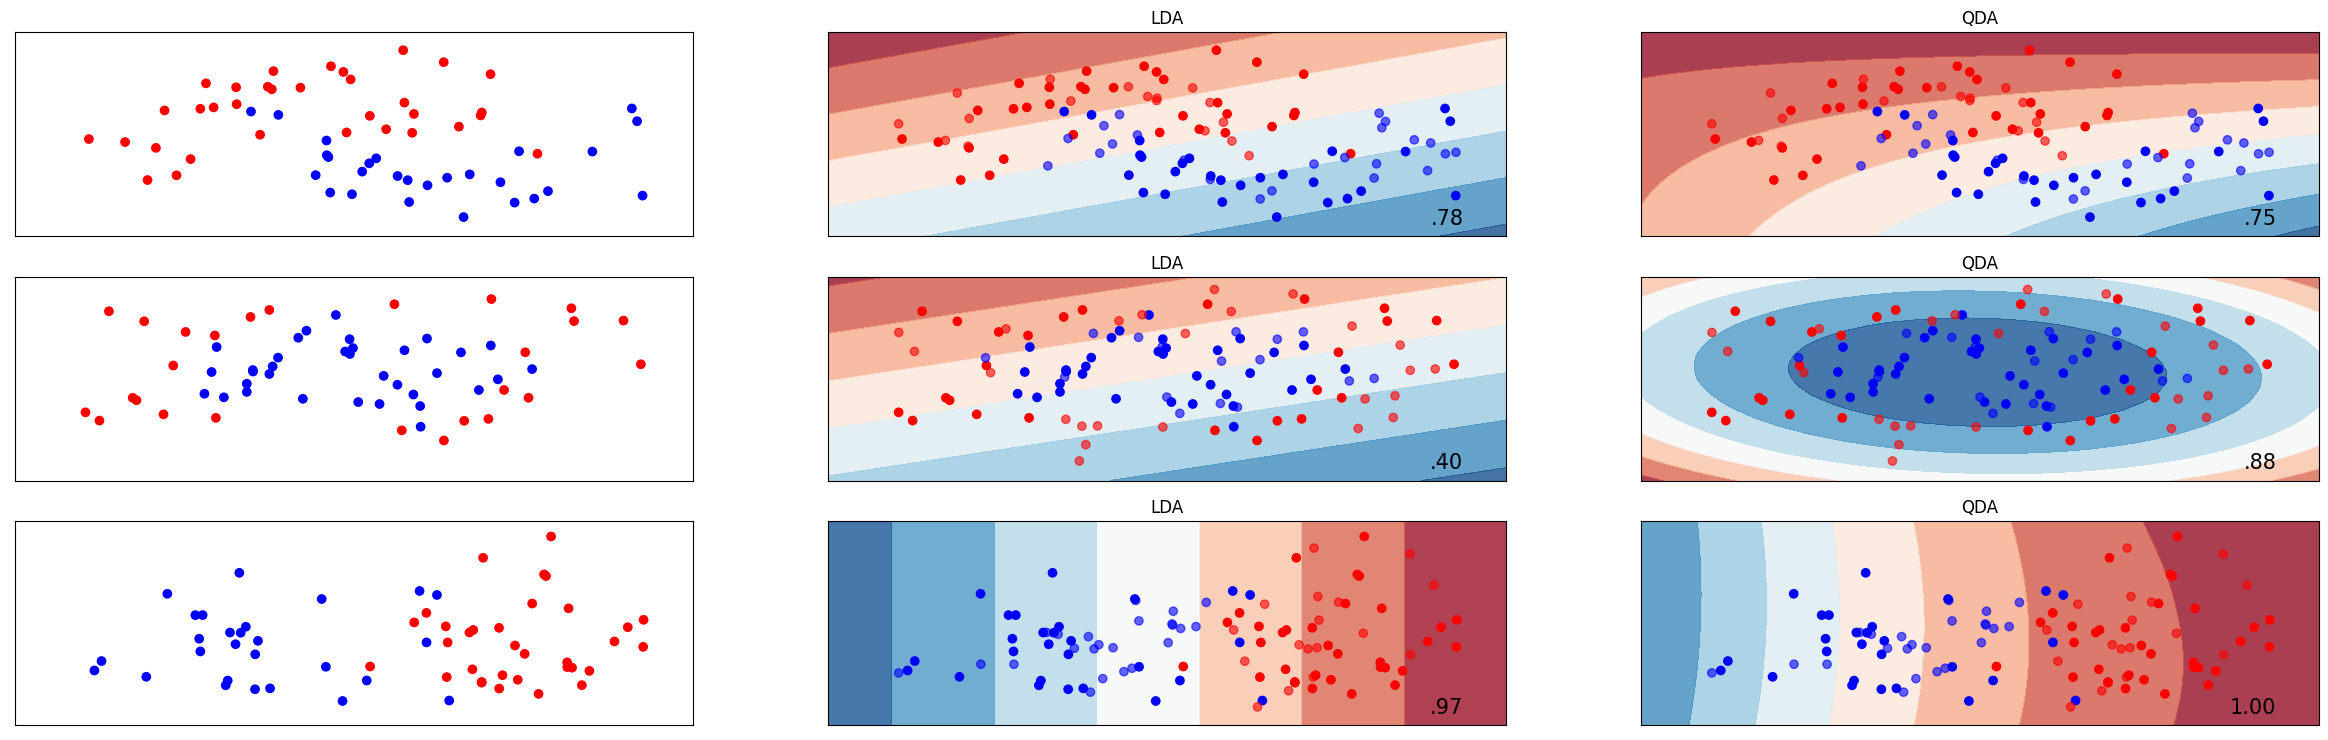

In [99]:
h =0.2
names = ["LDA", "QDA"]
classifiers = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X,y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(24,9))
i = 1

for ds in datasets:
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
    print(y_train)
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5 
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) 
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers)+1, i)
    ax.scatter(X_train[:, 0], X_train[:,1], c=y_train, cmap=cm_bright)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()    